<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/DerivadaNumerica_Runge_Kutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução às equações diferencias ordinárias:**

**Métodos de Runge Kutta e derivação numérica**


 *José Claudinei Ferrreira*

 *Universidade Federal de Alfenas (UNIFAL-MG)*

#**Derivação numérica**

Em muitos casos a função $f:(a-r,a+r)\to \mathbb{R}$, para algum $r>0$, é $n+1$ vezes diferenciável, com derivadas contínuas, mas tem expressão muito complicada. Por este motivo o cálculo de suas derivadas pode ser também complicado.

Assim, vamos adaptar a expressão para a [fórmula de Taylor](https://pt.wikipedia.org/wiki/F%C3%B3rmula_de_Taylor) para fazer aproximações para essas derivadas.

Lembramos da fórmula de Taylor  de $f(x)$ como
$$
f(a+h)=f(a)+ f'(a) h+\frac{1}{2!}f''(a)h^2+\cdots +\frac{1}{n!}f^{(n)}(a)h^n+E(h),$$
em que $h=x-a$ e $$E(h)=\frac{1}{(n+1)!}f^{(n+1)}(b)h^{n+1},$$ para algum $b\in (a-r,a+r)$, representa o erro cometido na aproximação de $f(x)$ pelo polinômio de Taylor de ordem $n$ de $f(x)$, que toma a forma  $$p_n(h)=f(a)+ f'(a) h+\frac{1}{2!}f''(a)h^2+\cdots +\frac{1}{n!}f^{(n)}(a)h^n.$$






**Exemplo 1**

Seja $f(x)=cos(x)$. Então, para $a=0$, você pode verificar que, fixado $2n$, $$p_{2n}(h)=\sum_{i=0}^n\frac{(-1)^i}{(2i)!}x^{2i}.$$



In [47]:
import numpy as np

def p(n,s):
  p=1
  for i in range(1,n+1):
    p=p+(((-1)**i)/(np.math.factorial(2*i)))*s**(2*i)
  return p

Por exemplo, para $n=1$, temos que $$p_2(h)=1-\frac{h^2}{2}$$

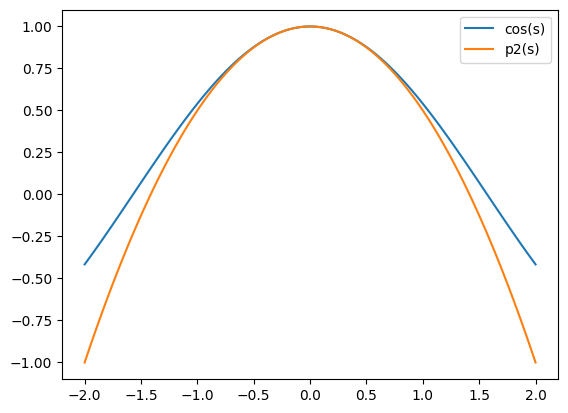

In [48]:
import matplotlib.pyplot as plt

s=np.linspace(-2,2,100)
y=p(1,s)

plt.plot(s,np.cos(s),label='cos(s)')
plt.plot(s,y,label='p2(s)')
plt.legend()
plt.show()

Observe que a aproximação melhora, quando $n$ cresce.

Veja o caso $2n=4$ e $2n=6$.

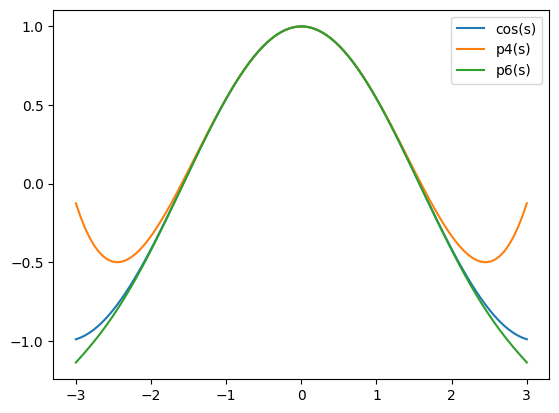

In [51]:
s=np.linspace(-3,3,100)
plt.plot(s,np.cos(s),label='cos(s)')
plt.plot(s,p(2,s),label='p4(s)')
plt.plot(s,p(3,s),label='p6(s)')
plt.legend()
plt.show()

#**Ordem 1**

Se tomarmos $n=1$ e $h\neq 0$ teremos então  
$$
\frac{f(a+h)-f(a)}{h}=f'(a) +\frac{1}{2!}f''(b)h,$$ e isso nos diz que $$
\frac{f(a+h)-f(a)}{h}\approx f'(a)$$ com erro proporcional $h\approx 0$.




Uma aplicação da derivada numérica é no funcionamento de radares móveis, como pode ser visto [neste vídeo](https://www.youtube.com/watch?v=vXw4i6_jjZY).

 Temos usado o caso $n=1$ no método de Euler. Entretanto, aqui $f(u)$ é conhecida e queremos conhecer $f'(u)$. No método de Euler é o contrário.

**Exemplo 2:**
Considere a função $$f(x)=\frac{1}{\ln(\tan(x))},\qquad x\in \left( \frac{\pi}{4},\frac{\pi}{2}\right),$$ e calcule analiticamente e numericamente $f'(1)$.

Lembre-se que, pela regra da cadeia, aplicada duas vezes, temos $$f'(x)=\frac{-1}{(\ln(\tan(x)))^2}\frac{1}{\tan(x)}\sec(x)^2$$ e assim,
$$f'(1)=\frac{-1}{(\ln(\tan(1)))^2}\frac{1}{\tan(1)}\sec(1)^2=-11.206552425345281...$$

Caso não se lembre dos conceitos usados anteriormente, ou queira apenas uma aproximação para $f'(1)$, testamos alguns valores de $h$.

Tomando $h=0.1$ temos que
$$\frac{f(a+h)-f(a)}{h}=-7.765505.$$
Tomando $h=0.01$ temos que
$$\frac{f(a+h)-f(a)}{h}=-10.724.$$
Tomando $h=0.001$ temos que
$$\frac{f(a+h)-f(a)}{h}= -11.15628
.$$
Tomando $h=0.0001$ temos que
$$\frac{f(a+h)-f(a)}{h}=  -11.2015
.$$

Isso sugere que para essa função, podemos facilmente obter uma boa aproximação para $f'(1)$ com $h\leq 0.0001$.


Você pode brincar com valores de $h$ no código que segue:

In [7]:
def f(x):
  p=np.log(np.tan(x))
  return 1/p

In [9]:
h=10**(-5)
a=1

df=(f(a+h)-f(a))/h

df

-11.206047358536251

Podemos melhorar este método de aproximação de derivadas numericamente tomando $n=2$.

Nesse caso usamos as seguintes expressões advindas do polinômio de Taylor de $f(x)$:
$$
f(a+h)=f(a)+ f'(a) h+\frac{1}{2!}f''(a)h^2+\frac{1}{3!}f'''(b)h^3$$ e
$$
f(a-h)=f(a)- f'(a) h+\frac{1}{2!}f''(a)h^2-\frac{1}{3!}f'''(c)h^3,$$ para algum $b,\,c\in (a-r,a+r)$.

Logo,
$$
\frac{f(a+h)-f(a-h)}{2h}=f'(a)+\frac{f'''(b)+f'''(c)}{2.3!}h^2$$

Assim,
$$
\frac{f(a+h)-f(a-h)}{2h}\approx f'(a),$$ com erro $$\frac{f'''(b)+f'''(c)}{2.3!}h^2=\frac{f'''(d)}{3!}h^2$$ que é proporcional $h^2\approx 0$.

Se ao invés de subtrairmos as expressão nós as somarmos obtemos

$$
\frac{f(a+h)-2f(a)+f(a-h)}{h^2}=f''(a)+\frac{f'''(b)-f'''(c)}{3!}h.$$

E segue que,
$$
\frac{f(a+h)-2f(a)+f(a-h)}{h^2}\approx f''(a)$$ com erro $$\frac{f'''(b)-f'''(c)}{3!}h$$ que é proporcional $h\approx 0$.



**Exemplo 3**

Consideramos novamente a função $$f(x)=\frac{1}{\ln(\tan(x))},\qquad x\in \left( \frac{\pi}{4},\frac{\pi}{2}\right),$$ e calculamos numericamente $f'(1)$.

Para estudarmos a aproximação numérica testamos alguns valores de $h$.
Tomando $h=0.1$ temos que
$$\frac{f(a+h)-f(a-h)}{2h}=-14.21946
.$$
Tomando $h=0.01$ temos que
$$\frac{f(a+h)-f(a-h)}{2h}=-11.23019.$$
Tomando $h=0.001$ temos que
$$\frac{f(a+h)-f(a-h)}{2h}= -11.20679
.$$
Tomando $h=0.0001$ temos que
$$\frac{f(a+h)-f(a-h)}{2h}=  -11.206554784370937
.$$

Isso sugere que para essa função, podemos facilmente obter uma aproximação melhor que a anterior para $f'(1)$ com $h\leq 0.001$.

In [11]:
h=10**(-5)
a=1

df=(f(a+h)-f(a-h))/(2*h)

df

-11.20655244895019

Deixo para vocês a verificação da estimativa de $f''(1)$:

In [14]:
d2f=(f(a+h)-2*f(a)+f(a-h))/(h**2)
d2f

101.01808278761835

**Ordem 4**

Considerando agora $n=3$ no polinômio de Taylor pode-se justificar a seguinte expressão
$$f'(a)\approx \frac{-f(a+2h)+8f(a+h)-8f(a-h)+f(a-2h)}{12h},$$ com erro $$\frac{1}{30}f^{(5)}(c)h^4,$$ que é proporcional a $h^4\approx 0$, para a aproximação numérica de $f'(1)$ para $f(x)$ como nos dois últimos exemplos.

Deixamos a verificação para o leitor.

Para que valores de $h$ podemos considerar a aproximação boa?


#**Várias variáveis**

Podemos considerar a derivada parcial de uma função $f(x)$, em relação à coordenada $x_i$, como a derivada da função $g(t)=f(x_1,\,\ldots,x_{i-1},\,t,\,x_{i+1},\ldots,x_n)$, em $t=x_i$, quando $x=(x_1,\,\ldots,x_{i-1},\,x_i,\,x_{i+1},\ldots,x_n)$.

Por exemplo,
$$\frac{\partial f(x)}{\partial x_1}\approx \frac{g(t+h)-g(t-h)}{2h}=\frac{f(x_1,\,\ldots,x_{i-1},\,t+h,\,x_{i+1},\ldots,x_n)-f(x_1,\,\ldots,x_{i-1},\,t-h,\,x_{i+1},\ldots,x_n)}{2h}.$$





**Exemplo 5**

Use algum dos métodos que mencionamos para aproximar $$\frac{\partial f(x)}{\partial x_1},\qquad  \frac{\partial^2 f(x)}{\partial x_1\partial x_2} \quad e \quad \frac{\partial f(x)}{\partial x_2},$$ para $$x=(1,2)\quad e\quad f(x)=\ln(1+x_1x_2).$$
Para que valores de $h$ podemos considerar a aproximação boa?

#**Os métodos de Runge-Kutta**

<font color=red> Aulas seguintes...